In [36]:
%matplotlib Widget

import sampling
import modeling

import importlib
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 4/4 [00:00<00:00,  6.84it/s]


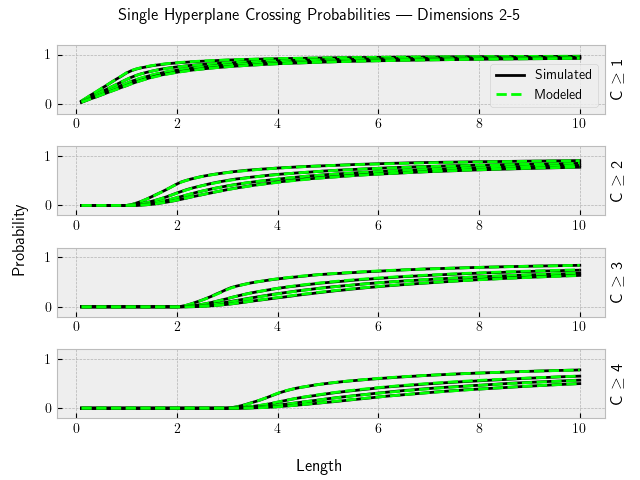

In [7]:
# Probability Given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 10000
dims = np.arange(2, 6, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axs = plt.subplots(len(Cs))
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
        ax.plot(lengths, sim_probs, "k")

        probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\ge$ ' + f"{c}")
        ax.yaxis.set_label_position("right")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-5")
plt.tight_layout()

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:17<00:00,  2.15s/it]


Text(0, 0.5, 'Probability')

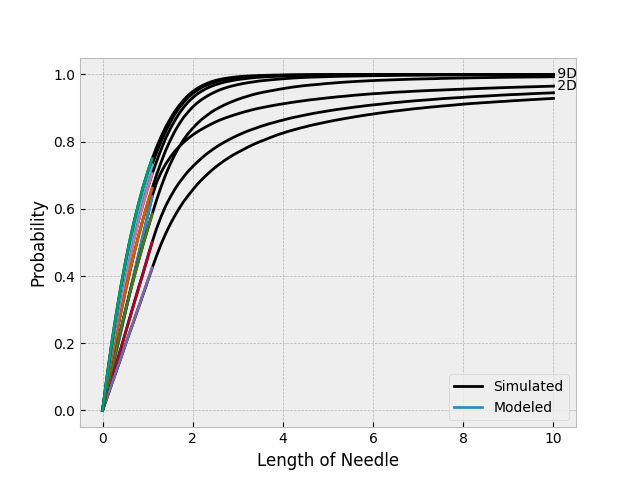

In [44]:
# Probability Given multiple sets of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
c = 1

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):
    spacing = (np.arange(dim)*2+11)/10
    hyperplanes = max(1, dim-3)

    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    # probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
    # ax.plot(lengths, probabilities, "--", color=(0,1,0))

    # Testing new model
    r_s = lengths[lengths<=min(spacing)]
    modeled_prob = 0
    for i in range(1, hyperplanes+1):
        # calculate reciprical sum
        reciprocal_sum = 0
        for combos in combinations(spacing[:hyperplanes], i):
            reciprocal_sum += 1/np.prod(combos)
        modeled_prob += (-1)**(i-1)*r_s**i*spec.gamma(dim/2)/np.pi**(i/2)/spec.gamma(dim/2+i/2)*reciprocal_sum

    # modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2*r_ml**2/np.pi/dim/spacing[0]/spacing[1]
    ax.plot(r_s, modeled_prob)

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
    # ax.plot(lengths[lengths<1], lengths[lengths<1]*spec.gamma(dim/2)/spec.gamma(0.5)/spec.gamma(dim/2+0.5))
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
# ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


In [35]:
importlib.reload(sampling)
# multi-spacing debug
# np.random.seed(2)
samples = 100000
dim = 5
hyperplanes = 3
spacing = (np.arange(dim)+11)/10
# spacing = np.ones(hyperplanes)
length = np.linspace(0, 5, 101)
length = 0.5

xs = np.random.random((samples, dim))*spacing[None, :]
hypersphere = sampling.get_samples_gaussian(samples, dim)
ys = xs + length * hypersphere

intersections = 0
for y in ys:
    if any(y[:hyperplanes]>spacing[:hyperplanes]) or any(y[:hyperplanes]<0):
    # if (y[0]>spacing[0] or y[0]<0) or (y[1]>spacing[1] or y[1]<0) or (y[2]>spacing[2] or y[2]<0) or (y[3]>spacing[3] or y[3]<0):
        intersections += 1
probability = intersections / samples
print(probability)

# prob that all hyperplanes are crossed at least once
print(length**hyperplanes/np.prod(spacing[:hyperplanes])/np.pi**(hyperplanes/2)*spec.gamma(dim/2)/spec.gamma((dim+hyperplanes)/2))

# prob that any hyperplane has been crossed once as long as r<min(S)
modeled_prob = 0
for i in range(1, hyperplanes+1):
    # calculate reciprical sum
    reciprocal_sum = 0
    for combos in combinations(spacing[:hyperplanes], i):
        reciprocal_sum += 1/np.prod(combos)
    modeled_prob += (-1)**(i-1)*length**i*spec.gamma(dim/2)/np.pi**(i/2)/spec.gamma(dim/2+i/2)*reciprocal_sum

print(modeled_prob)
    


# fig, ax = plt.subplots()
# ax.plot(length, sampling.get_sim_prob_e(samples, dim, length, 0, hyperplanes, spacing))
# # print((2*length*np.sum(spacing)-length**2)/(np.pi*np.prod(spacing)))
# ax.plot(length, 4/np.pi * (length-0.5*length**2))

0.40575
0.0028983636198261823
0.40705538050434564


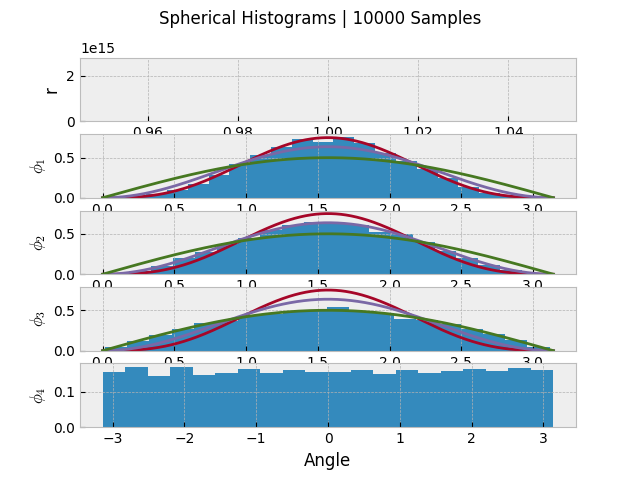

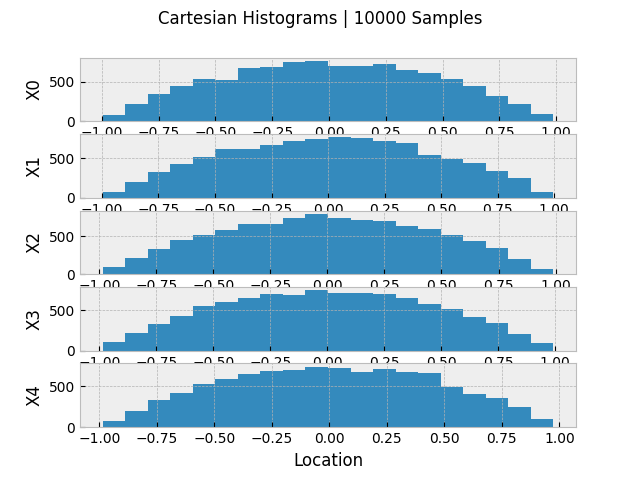

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)